In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import jarque_bera

In [ ]:
# Leer el txt con 10 columnas separadas por espacios
data5 = pd.read_csv('dataE.txt', sep='\s+', header=None)

# Imprimir las primeras filas para verificar la lectura
print(data5.head())

In [ ]:
pd.DataFrame(data5).head()

In [ ]:
# Identifique la columna que podría ser mejor explicada en términos de las otras a través de un modelo lineal

# Usar la covarianza para identificar la columna que mejor se puede explicar en términos de las otras
cov = data5.cov()
cov

# La columna que mejor se puede explicar en términos de las otras es la columna 9, ya que tiene la mayor covarianza con las otras columnas  

In [ ]:
# Cálculo de la covarianza
s = np.cov(data5, rowvar=False)
s = np.round(s, 2)
print(s)

In [ ]:
# Cálculo de la correlación
k = np.corrcoef(data5, rowvar=False)
k = np.round(k, 4)
print(k)

In [ ]:
# Gráfico de la matriz de correlación
sns.pairplot(pd.DataFrame(data5))
plt.show()

In [155]:
# Coinstruir un modelo que explique x9 en términos de las otras variables

# Variable dependiente: Columna 10
y = data5.iloc[:, 9] # Se toma la columna 10 como variable dependiente

# Variables independientes
x = data5.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8]] # Se toman las columnas 1 a 9 como variables independientes

# Eliminamos las variables no relevantes 
# x = data5.iloc[:, [1, 2, 3, 4,]] 

# Ajuste del modelo
model = LinearRegression() # Se instancia el modelo de regresión lineal
model.fit(x, y) # Se ajusta el modelo usando la variable dependiente y las independientes x

# Coeficientes, intercepto y R^2 del modelo
print("Coeficientes:", model.coef_) # Que tan sensible es la ultima columna a los cambios en las otras 9
print("Intercepto:", model.intercept_) 
print("R^2:", model.score(x, y)) # Porcentaje de variabilidad 

Coeficientes: [-0.04949003  2.12364647  2.40322363  4.19380154  5.14927576 -0.05796878
  0.45103952  0.29308853  0.04274137]
Intercepto: 0.09313674654342269
R^2: 0.9149693936751537


In [158]:
# Ajuste del modelo de regresión lineal usando statsmodels
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      9   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1564.
Date:                Fri, 10 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:08:35   Log-Likelihood:                -4323.5
No. Observations:                1318   AIC:                             8667.
Df Residuals:                    1308   BIC:                             8719.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0931      0.178      0.522      0.6

(array([  2.,   7.,   7.,  11.,  22.,  52.,  70.,  92., 115., 146., 176.,
        155., 124., 118., 104.,  55.,  28.,  20.,  11.,   3.]),
 array([-21.23765692, -19.26327254, -17.28888817, -15.31450379,
        -13.34011942, -11.36573505,  -9.39135067,  -7.4169663 ,
         -5.44258192,  -3.46819755,  -1.49381317,   0.4805712 ,
          2.45495558,   4.42933995,   6.40372433,   8.3781087 ,
         10.35249308,  12.32687745,  14.30126183,  16.2756462 ,
         18.25003058]),
 <BarContainer object of 20 artists>)

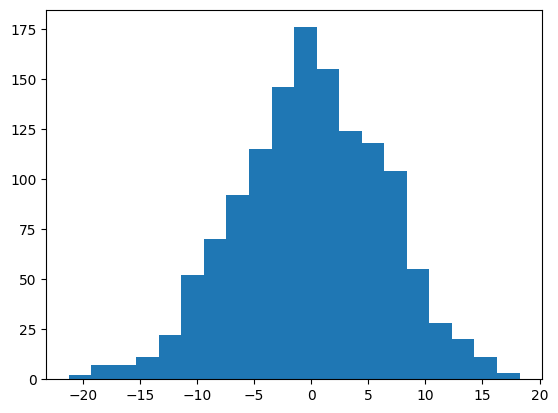

In [161]:
# Histograma de los residuos
res = model.resid
plt.hist(res, bins=20)

In [ ]:
# Media de los residuos
res.mean()

In [ ]:
# Calculo de la matriz de correlacion de las variables relevantes sin el intercepto
x = x.iloc[:, 1:]
k = np.corrcoef(x, rowvar=False)
k = np.round(k, 4)
print(k)

In [ ]:
# Indicador para ver que variable x se explica mejor en terminos de las otras

# Paso 1: Construir la matriz de covarianza (KxK): c = cov(data)
# Paso 2: Diagonal de la matriz de covarianza: d = diag(c)
# Paso 3: Inversa de c: ci = inv(c)
# Paso 4: Diagonal de ci (de la inversa): di = diag(ci)
# Paso 5: Indicador (Porcentaje explicado por las otras de ella): r = 1-1./(d.*di) 

# c = np.cov(data5, rowvar=False)
c = np.cov(np.random.randn(1000, 5), rowvar=False)
d = np.diag(c)
ci = np.linalg.inv(c)
di = np.diag(ci)
r = 1-1./(d*di)

print("Indicador:", r)

In [ ]:
k = 1
plt.plot(x, y, 'o')  # Grafica los puntos de x contra y
R2 = 0
R2V = []

while R2 < 0.95:
    x1 = sm.add_constant(x)  # Agrega una columna de unos a x
    model = sm.OLS(y, x1).fit()  # Ajusta el modelo de regresión lineal
    beta = model.params  # Coeficientes de regresión estimados

    yhat = x1.dot(beta)  # Calcula yhat

    r = y - yhat  # Calcula los residuos
    rra = np.abs(r)
    M = np.max(rra)
    i = np.where(rra == M)  # Encuentra el índice del valor absoluto máximo

    x = np.delete(x, i, axis=0)  # Elimina la fila correspondiente en x
    y = np.delete(y, i)  # Elimina el valor correspondiente en y

    R2 = model.rsquared_adj  # Calcula el R cuadrado ajustado
    R2V.append(R2)  # Almacena el R cuadrado ajustado en un arreglo
    k += 1 # Contador de iteraciones


In [ ]:
# Gráfica de R^2 vs. iteraciones
plt.plot(R2V)
plt.xlabel('Iteraciones')
plt.ylabel('R^2')
plt.show()

In [ ]:
# Ajuste del modelo de regresión lineal usando statsmodels 
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

In [ ]:
# Histograma de los residuos
plt.hist(r, bins=40)
plt.show()

In [ ]:
# Cuantos datos fueron eliminados?
print("Cantidad de datos eliminados:", 1000 - k)

In [ ]:
# Prueba de Jarque-Bera para la normalidad de los residuos
h, p = jarque_bera(r)
if p < 0.05:
    print("Los residuos no siguen una distribución normal y sigue un modelo lineal.")
else:
    print("Los residuos siguen una distribución normal y no sigue un modelo lineal.")


In [ ]:
# Cálculo de los componentes SCT, SCM y SCR
SCT = np.sum((y - y.mean())**2)  # Suma de Cuadrados Totales
SCM = np.sum((model.predict(x) - y.mean())**2)  # Suma de Cuadrados del Modelo
SCR = np.sum((y - model.predict(x))**2)  # Suma de Cuadrados de los Residuos
R2 = SCM / SCT  # Coeficiente de Determinación R^2

# Impresión de los resultados
print("SCT:", SCT)  # Suma de Cuadrados Totales (SCT)
print("SCM:", SCM)  # Suma de Cuadrados del Modelo (SCM)
print("SCR:", SCR)  # Suma de Cuadrados de los Residuos (SCR)
print("SCM + SCR:", SCM + SCR)  # Verificación: SCM + SCR debe ser igual a SCT

# R^2 = SCM / SCT
print("R^2:", R2)

# Verificación: R^2 + SCR/SCT debería ser aproximadamente igual a 1
print("R^2 + SCR/SCT:", R2 + SCR / SCT)

# Porcentaje de R^2 y Residuos en relación con SCT
print("Porcentaje de R^2:", (SCM / SCT) * 100, "%")
print("Porcentaje de Residuos:", (SCR / SCT) * 100, "%")
